# Multi-Dimensional Scaling (MDS) 란? 
**PCA**
- MDS 설명하기에 앞서 PCA에 관한 간단한 설명을 하겠습니다. 
- PCA는 원본 고 차원의 데이터를 저 차원 초평면에 투영(projection)하는 방법으로 데이터의 분산을 최대화 하며 서로 직교하는 unit vector를 찾는 것을 목적으로 합니다. 

**MDS** 
- MDS 는 PCA와 달리 원본 데이터 필드 상에서의 레코드들 간의 거리를 저차원에서도 최대한 보존하는 것을 목적으로 합니다. 
- 고차원 상에서의 매니폴드로 부터 개체간 거리를 동일하게 유지되는 저차원 공간으로 매핑하는 것을 목적으로 합니다. 
- MDS에서는 데이터의 특징이 다른 객체간의 pairwise-distance가 됩니다. 
- Distance는 유클리디안 거리를 기본적으로 사용 

**MDS 활용** 
- MDS 방법을 활용해 저차원으로 매핑할 경우 2차원 평면에서의 시각화가 가능하며 데이터를 직관적으로 파악할 수 있게 됩니다. 
- 도시별 좌표 정보가 있을 때 도시별로 어디가 가깝고 먼지 확인하고 싶을 때 MDS를 사용하면 직관적으로 알 수 있게 됩니다. 


# MDS step 
- MDS 활용 예시로 iris 데이터를 사용 

## step 1. Construct Proximity/Distance Matrix 
- 기존의 데이터를 유클리디안 거리를 이용해 D(Distance) Matrix로 변환 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris
from tqdm import tqdm 

In [2]:
#데이터 로드 
data = load_iris() 
df = pd.DataFrame(data.data)
df.columns = data['feature_names']
df['class'] = data['target']
df = df.sample(frac=1,random_state=42).reset_index(drop=True)

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,1
146,4.9,2.5,4.5,1.7,2
147,5.8,4.0,1.2,0.2,0
148,5.8,2.6,4.0,1.2,1


In [3]:
#객체별 거리 계산 후 Dmatrix 생성 
Dmatrix = []
for i in tqdm(range(len(df))):
    values = df.iloc[i,:].values
    target_values = df.values
    Dmatrix.append(np.sum(((target_values-values)**2),axis=1))
Dmatrix = pd.DataFrame(Dmatrix)    
Dmatrix
    

100%|██████████| 150/150 [00:00<00:00, 1285.99it/s]


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.00,11.97,9.65,0.15,0.54,12.73,1.48,3.10,0.50,0.74,...,0.39,0.27,1.93,1.60,11.85,0.50,2.82,15.78,0.62,4.29
1,11.97,0.00,40.48,11.18,14.03,0.30,6.43,21.49,13.09,7.87,...,11.90,10.06,18.14,18.49,0.26,8.45,16.13,0.31,8.55,27.48
2,9.65,40.48,0.00,10.38,7.07,42.70,17.39,4.13,9.81,14.83,...,10.30,10.54,8.54,6.89,41.38,13.01,13.97,46.47,14.23,1.56
3,0.15,11.18,10.38,0.00,0.75,11.82,1.01,2.85,0.53,0.53,...,0.50,0.24,1.58,1.47,11.14,0.31,2.41,14.83,0.47,4.54
4,0.54,14.03,7.07,0.75,0.00,15.21,2.90,2.00,0.82,1.86,...,0.67,0.43,2.81,2.10,14.37,1.14,4.88,17.84,1.72,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.50,8.45,13.01,0.31,1.14,8.91,0.42,3.94,0.66,0.12,...,0.45,0.19,2.55,2.54,8.35,0.00,2.94,11.58,0.14,6.29
146,2.82,16.13,13.97,2.41,4.88,15.75,2.62,5.08,2.82,2.46,...,3.17,3.61,0.83,1.62,15.15,2.94,0.00,20.20,2.32,7.21
147,15.78,0.31,46.47,14.83,17.84,0.65,9.22,25.64,16.98,10.98,...,15.59,13.39,22.41,22.78,0.77,11.58,20.20,0.00,11.80,32.39
148,0.62,8.55,14.23,0.47,1.72,8.69,0.30,4.88,0.66,0.02,...,0.51,0.55,2.53,2.74,8.09,0.14,2.32,11.80,0.00,7.27


## step2 : Inner Product B 계산 
- Distance Matrix D를 이용해 바로 X를 계산할 수 없음 
- Inner product Matrix B를 계산한 뒤 이를 이용해 X를 계산 

자세한 수식은 make down 참조 

Inner product B matrix를 계산하는 과정을 간단하게 정리하면 

D -> A -> B 를 계산 함 

$a_{rs} = -{1\over 2}d_{rs}^2$

$[A]_{rs} = a_{rs}$

$H = I - {1\over n}11^T$


$B = HAH$

In [4]:
n = len(Dmatrix)
H = np.eye(n)- (1/n)*(np.ones((n,n))) 
B = -H.dot(Dmatrix).dot(H)/2

In [5]:
pd.DataFrame(B)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.019463,-2.167137,3.554729,0.779863,1.293463,-2.329537,-0.170737,1.525129,1.011329,0.214596,...,0.916929,0.693996,1.080063,1.293863,-2.141271,0.360129,0.600596,-2.664004,0.334529,2.355663
1,-2.167137,6.616263,-9.061871,-1.936737,-2.653137,6.683863,0.152663,-4.871471,-2.485271,-0.552004,...,-2.039671,-1.402604,-4.226537,-4.352737,6.452129,-0.816471,-3.256004,7.869396,-0.832071,-6.440937
2,3.554729,-9.061871,15.739996,3.025129,5.388729,-9.954271,-0.765471,8.370396,3.716596,0.529863,...,3.322196,2.919263,5.135329,6.009129,-9.546004,1.465396,2.385863,-10.648737,0.889796,11.080929
3,0.779863,-1.936737,3.025129,0.690263,1.023863,-2.039137,-0.100337,1.485529,0.831729,0.154996,...,0.697329,0.544396,1.090463,1.194263,-1.950871,0.290529,0.640996,-2.353604,0.244929,2.066063
4,1.293463,-2.653137,5.388729,1.023863,2.107463,-3.025537,-0.336737,2.619129,1.395329,0.198596,...,1.320929,1.157996,1.184063,1.587863,-2.857271,0.584129,0.114596,-3.150004,0.328529,3.629663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.360129,-0.816471,1.465396,0.290529,0.584129,-0.828871,-0.050071,0.695796,0.521996,0.115263,...,0.477596,0.324663,0.360729,0.414529,-0.800604,0.200796,0.131263,-0.973337,0.165196,0.946329
146,0.600596,-3.256004,2.385863,0.640996,0.114596,-2.848404,0.250396,1.526263,0.842463,0.345729,...,0.518063,0.015129,2.621196,2.274996,-2.800137,0.131263,3.001729,-3.882871,0.475663,1.886796
147,-2.664004,7.869396,-10.648737,-2.353604,-3.150004,7.916996,0.165796,-5.538337,-3.022137,-0.698871,...,-2.476537,-1.659471,-4.953404,-5.089604,7.605263,-0.973337,-3.882871,9.432529,-1.048937,-7.487804
148,0.334529,-0.832071,0.889796,0.244929,0.328529,-0.684471,0.044329,0.260196,0.556396,0.199663,...,0.481996,0.179063,0.405129,0.348929,-0.636204,0.165196,0.475663,-1.048937,0.269596,0.490729


## step 3. Eigen-decomposition 고유벡터 구하기 

- 앞선 과정을 통해 Inner product matrix B를 구할 수 있었음 
- 이번 스텝에서는 B에 Eigen decomposition을 통해 digonal matrix $\Lambda$와 EigenVectors $V$를 계산 함 
- Eigen decomposition 
    - B -> Eigen_value, Eigen_vector 
    - $B = V\Lambda V^T$
    - $\Lambda = V^T B V$

In [6]:
eigen_value,eigen_vector = np.linalg.eig(B)
inverseEigenVectors = np.linalg.inv(eigen_vector) 
diagonal= inverseEigenVectors.dot(B).dot(eigen_vector)

## step4 : 원하는 차원으로 축소 
- $X = V_1\Lambda_1^{1\over 2}$ 이기 때문에 위에서 계산한 $\Lambda$ 와 $V$를 이용해 X 계산 
- diagonal matrix $\Lambda$ 와 InverseEigenVectors $V$

In [7]:
dimension = 2 
# diagonal[diagonal<1] = 0
coordinate_X = eigen_vector[:,0:dimension].dot(np.sqrt(diagonal[0:dimension,0:dimension]))

c:\Users\dags8\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


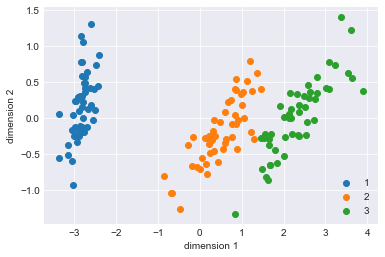

In [8]:
import matplotlib.pyplot as plt 
y =df['class'].values +1
with plt.style.context("seaborn-darkgrid"):
    for l in np.unique(y):
        plt.scatter(coordinate_X[y==l,0], coordinate_X[y==l,1],label=l)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.legend()
    plt.show()

# MDS library example 


In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,1
146,4.9,2.5,4.5,1.7,2
147,5.8,4.0,1.2,0.2,0
148,5.8,2.6,4.0,1.2,1


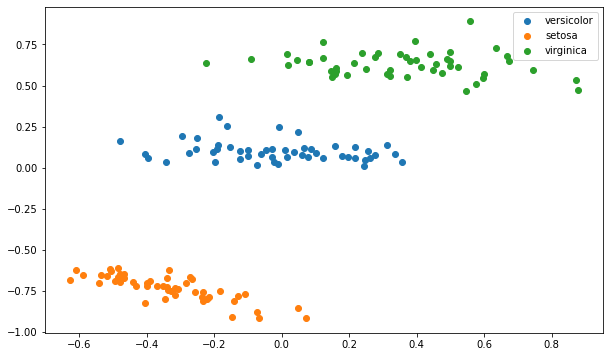

29.795013263505894


In [26]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)


from sklearn.manifold import MDS
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(x_scaled)

plt.figure(figsize=(10,6))
label_unique = df['class'].unique()
cities = {key:value for key,value in enumerate(data.target_names)}
for i in range(len(label_unique)):
    label = label_unique[i]
    scatter_value = x_sklearn[df[df['class'] == label].index]
    plt.scatter(x = scatter_value[:,0],
                y = scatter_value[:,1],
                label = cities[label])
    plt.legend()            
plt.show()
print(mds_sklearn.stress_)